In [25]:
%load_ext autoreload
%autoreload 2
%pip install matplotlib
%pip install cvxpy
%pip install mosek

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 24.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import mpc
import matplotlib.pyplot as plt
import numpy as np


In [18]:
horizon = 8
t = 0.1

u = mpc.newMPC(
    np.array([10000, 0, 0, 0, 0, 0]), np.array([0, 0, 0, 0, 0, 0]), horizon=horizon, t=t
)
XH = mpc.get_XH(horizon, t=t)
u

Solution found!


/home/ekter/Documents/codaj/python/.venv/lib/python3.12/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 1.00000000e+04, -2.64011720e-20, -6.01985218e-17, -1.38603286e-21,
       -5.41052307e-21, -2.12896708e-19, -8.08011246e-03, -8.80942166e-03,
        2.03493653e-01,  2.03345037e-01, -1.12648103e-01, -1.12799748e-01,
       -2.50890394e-01, -2.51042514e-01, -3.44030051e-01, -3.44182143e-01,
       -4.95892922e-01, -4.96045002e-01, -4.99999264e+00, -4.99999261e+00,
       -4.99996347e+00, -4.99995514e+00,  1.00000000e+00])

In [19]:
XH@u

array([ 9.99999965e+03,  4.33740126e-03,  6.65447645e-03,  4.57819535e-02,
        7.29309196e-07,  7.29309196e-06,  1.00000000e+00,  1.00000085e+04,
       -1.04566695e-01, -1.59628996e-01, -2.80513672e+00,  2.21547015e-07,
        8.77925291e-06,  1.00000000e+00,  9.99999612e+03,  6.00580902e-02,
        7.28635535e-02, -3.70504614e+00,  1.73799391e-07,  1.02956998e-05,
        1.00000000e+00,  9.99998907e+03,  1.25841016e-01,  2.05047921e-01,
       -3.41476014e+00,  1.69499568e-07,  1.18168961e-05,  1.00000000e+00,
        9.99998445e+03,  1.75663945e-01,  2.91660397e-01, -1.51170750e+00,
        1.69041256e-07,  1.33378091e-05,  1.00000000e+00,  9.99997761e+03,
        2.53177254e-01,  4.19989582e-01,  2.84631071e+00,  1.68984725e-07,
        1.48586151e-05,  1.00000000e+00,  9.99978776e+03,  2.56576864e+00,
        3.98199315e+00, -1.18292485e-01,  1.68672168e-08,  1.48583025e-05,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

array([[-0.00808011, -0.00880942],
       [ 0.20349365,  0.20334504],
       [-0.1126481 , -0.11279975],
       [-0.25089039, -0.25104251],
       [-0.34403005, -0.34418214],
       [-0.49589292, -0.496045  ],
       [-4.99999264, -4.99999261],
       [-4.99996347, -4.99995514]])

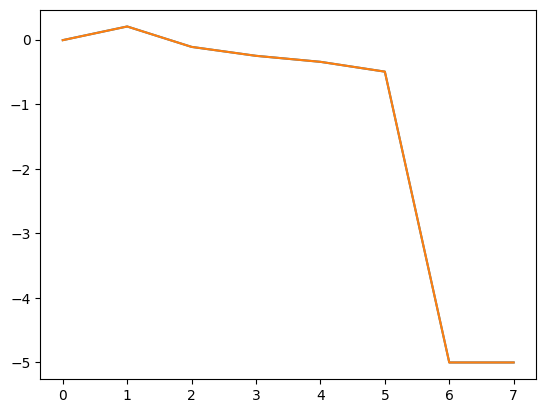

In [20]:
u_inputs = u[6:-1].reshape((-1,2))
plt.plot(u_inputs)
u_inputs

In [21]:
x_states = (XH@u).reshape((-1,7))[:, 0:6]
x_states


array([[ 9.99999965e+03,  4.33740126e-03,  6.65447645e-03,
         4.57819535e-02,  7.29309196e-07,  7.29309196e-06],
       [ 1.00000085e+04, -1.04566695e-01, -1.59628996e-01,
        -2.80513672e+00,  2.21547015e-07,  8.77925291e-06],
       [ 9.99999612e+03,  6.00580902e-02,  7.28635535e-02,
        -3.70504614e+00,  1.73799391e-07,  1.02956998e-05],
       [ 9.99998907e+03,  1.25841016e-01,  2.05047921e-01,
        -3.41476014e+00,  1.69499568e-07,  1.18168961e-05],
       [ 9.99998445e+03,  1.75663945e-01,  2.91660397e-01,
        -1.51170750e+00,  1.69041256e-07,  1.33378091e-05],
       [ 9.99997761e+03,  2.53177254e-01,  4.19989582e-01,
         2.84631071e+00,  1.68984725e-07,  1.48586151e-05],
       [ 9.99978776e+03,  2.56576864e+00,  3.98199315e+00,
        -1.18292485e-01,  1.68672168e-08,  1.48583025e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

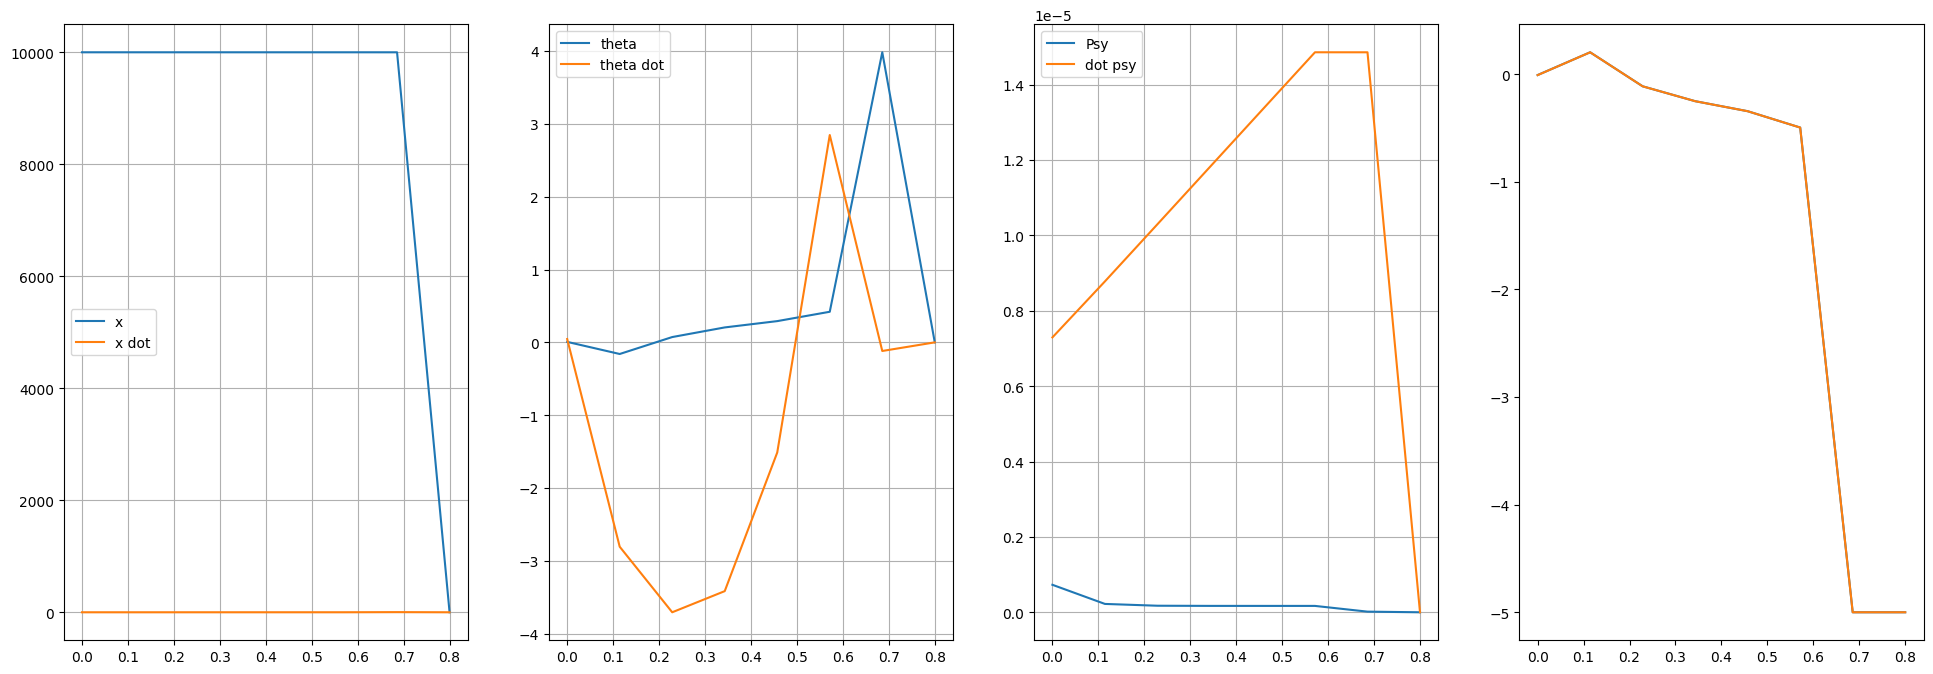

In [22]:
def plot_states(x_states_, u, t):

    plt.subplot(141)

    plt.plot(t, x_states_[:,0], label='x')
    plt.plot(t, x_states_[:,1], label='x dot')
    plt.grid()
    plt.legend()


    plt.subplot(142)

    plt.plot(t, x_states_[:,2], label='theta')
    plt.plot(t, x_states_[:,3], label='theta dot')
    plt.grid()
    plt.legend()


    plt.subplot(143)

    plt.plot(t, x_states_[:,4], label='Psy')
    plt.plot(t, x_states_[:,5], label='dot psy')
    plt.grid()
    plt.legend()


    plt.subplot(144)

    u_inputs = u[6:-1].reshape((-1,2))
    plt.plot(t, u_inputs)


plt.figure(figsize=(24,8))
plot_states(x_states, u, np.linspace(0, horizon*t, horizon))


Solution found!
[-2.60067914e-06  3.18038961e-05  4.87937972e-05  3.35695133e-04
  5.85095078e-07  5.85095006e-06] [ 0.00023063 -0.00035447]
Solution found!
[ 7.07061026e-05 -8.58504687e-04 -1.23335070e-03 -7.18626778e-03
  1.82109856e-06  1.23606104e-05] [0.00199519 0.00134417]
Solution found!
[-6.99606744e-04  8.47442818e-03  1.08898321e-02  4.24253215e-02
 -5.81918685e-06 -7.64029337e-05] [-0.0207349  -0.01185854]
Solution found!
[-1.00507485e-02  1.22490400e-01  2.06477257e-01  1.70214218e+00
 -1.23912749e-05 -6.57208088e-05] [-0.24228934 -0.24335756]
Solution found!
[-1.94398027e-02  2.78266677e-01  7.82663337e-01  1.09506298e+01
 -1.89648735e-05 -6.57359866e-05] [-0.51519348 -0.51519196]
Solution found!
[-2.89405817e-02  7.86953810e-01  2.57806032e+00  4.00956228e+01
 -2.55370108e-05 -6.57213723e-05] [-0.888748   -0.88874946]
Solution found!
[-3.87894975e-02  2.41081550e+00  8.24888226e+00  1.32391744e+02
 -3.20979395e-05 -6.56092874e-05] [-2.10819194 -2.10820315]
Solution found!

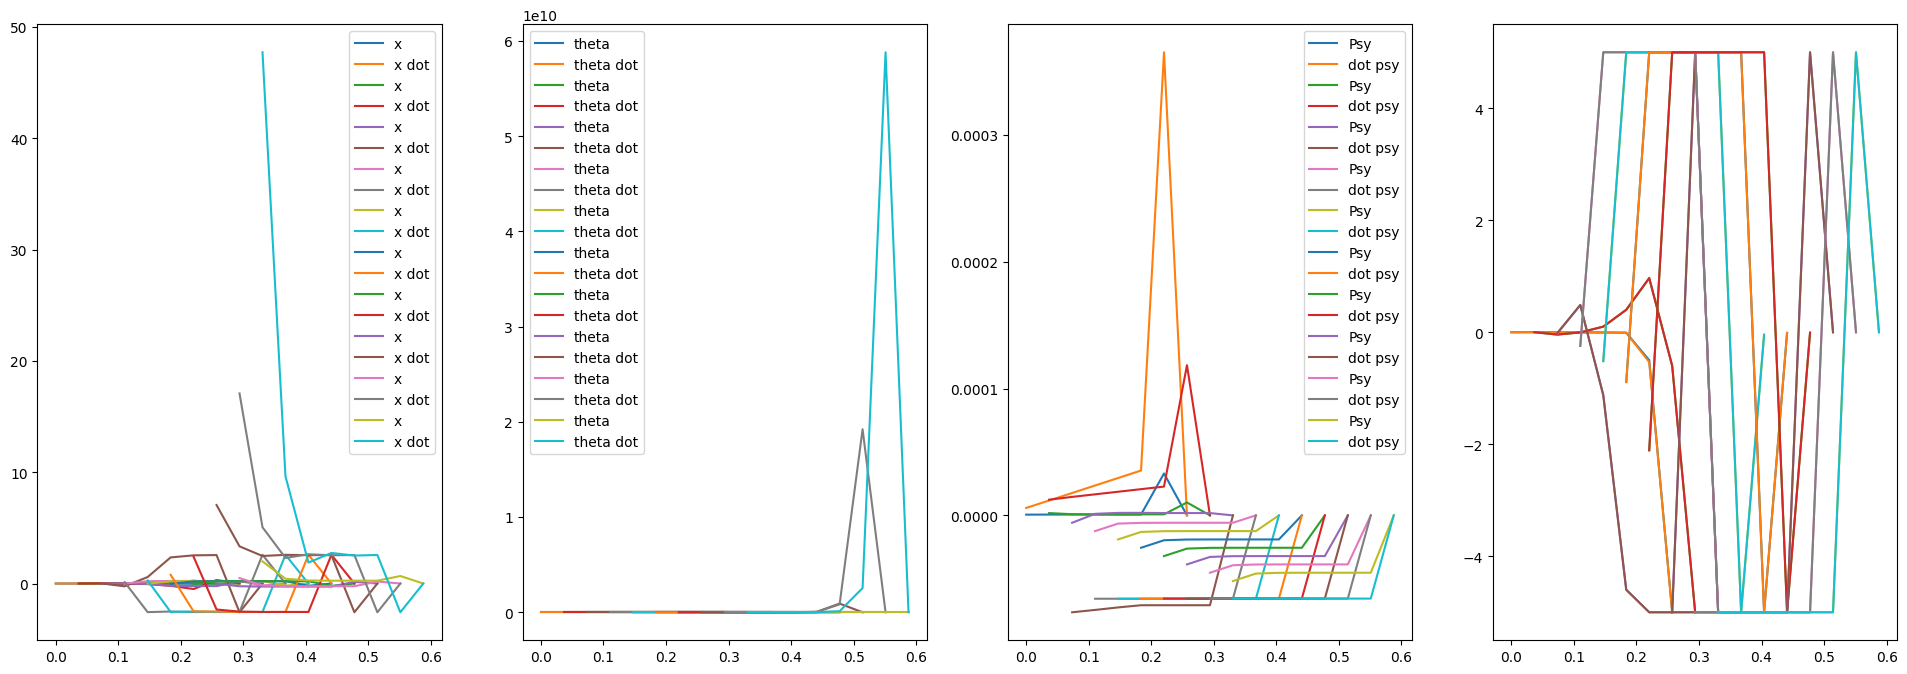

In [23]:
MAX = 10

x0 = np.array([0,0,0,0,0,0])
t = np.linspace(0, MAX+horizon)*t

plt.figure(figsize=(24,8))

for i in range(MAX):
    u = mpc.newMPC(x0, np.array([0,0,0,0,0,0]), horizon=8)
    x0 = (XH@u).reshape((-1,7))[0, 0:6]
    plot_states((XH@u).reshape((-1,7))[:, 0:6], u, t[i:i+horizon])
    print(x0, u[6:8])


In [27]:
#### System Dynamics
# Initial Conditions
# IC_P = np.array([-np.pi,0])

Ts = 0.1
IC_P = np.array([-0.26,0])
A = np.array([[1, Ts], [0, 1]])
B = np.array([[0.5*Ts**2], [Ts]])

## Reachability problem for horizon H=1
H=14 # horizon starts at 0
SAT = 5
umax = SAT
umin = -SAT

Horizon 14
Construction of Optim. Problem: 0.04408097267150879 [s]
Solving of Optim. Problem: 0.14324450492858887 [s]
(15,)


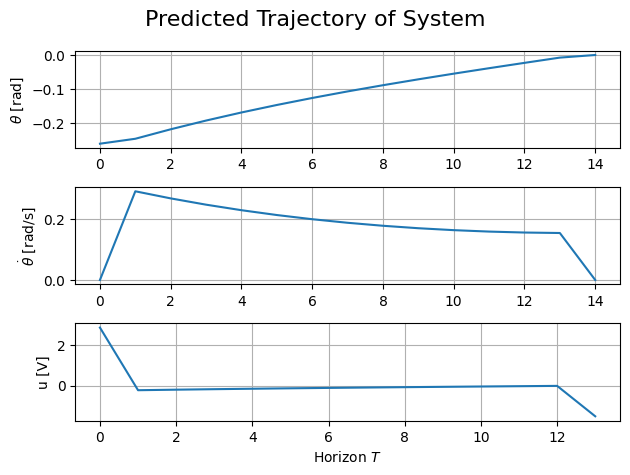

In [28]:

import time
import cvxpy as cp

t0 = time.time()

SAT = 60
umax = SAT
umin = -SAT

n = 2
m = 1

Q = np.eye(n)*10
R = np.eye(m)*0

# Varibles for the entire horizon
x = cp.Variable((n, H + 1))
u = cp.Variable((m, H))

cost = 0
cons = []
# Set constraints
for i in range(H):
    cost += cp.quad_form(x[:, i], Q) + cp.quad_form(u[:, i], R)
    cons += [x[:, i + 1] == A@x[:, i] + B@u[:, i], u[:, i]<=umax, u[:, i]>=umin]
    cons += [x[:, i + 1] == A@x[:, i] + B@u[:, i]]


# Start and end constraints
cons += [x[:, H] == 0, x[:, 0] == IC_P]
prob = cp.Problem(cp.Minimize(cost), cons)

t1 = time.time()
sol = prob.solve()
tend = time.time()

construct_opt = t1-t0
solve_opt = tend-t1


print(f'Horizon {H}')
print(f'Construction of Optim. Problem: {construct_opt} [s]')
print(f'Solving of Optim. Problem: {solve_opt} [s]')


## TEST MPC on one time step
if prob.status == cp.OPTIMAL:
    fig = plt.figure()
    fig.suptitle('Predicted Trajectory of System', fontsize=16)

    ax1 = fig.add_subplot(3, 1, 1)
    x1 = x[0, :].value
    print(x1.shape)
    ax1.plot(x1)
    ax1.set_ylabel(r"$\theta$ [rad]")
    ax1.grid()

    ax2 = fig.add_subplot(3, 1, 2)
    x2 = x[1, :].value
    ax2.plot(range(H+1), x2)
    ax2.set_ylabel(r"$\dot\theta$ [rad/s]")
    ax2.grid()

    ax2 = fig.add_subplot(3, 1, 3)
    ax2.plot(range(H), u.value.reshape(-1))
    ax2.set_ylabel(r"u [V]")
    ax2.set_xlabel(r"Horizon $T$")
    ax2.grid()

    fig.tight_layout()
    plt.show()
else:
    print("Problem is infeasible")